In [38]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import cvxpy as cp
import os
from time import time
import pickle

import utils
import APG_CG
import setup
import helper
import algos


from utils import *
from APG_CG import *
from setup import *
from helper import *
from algos import *
# import sparse

import importlib
importlib.reload(utils)
importlib.reload(APG_CG)
importlib.reload(setup)
importlib.reload(algos)
importlib.reload(helper)

<module 'helper' from '/Users/aditi/Documents/QST_camera_ready/code/helper.py'>

In [49]:
nQubits = 5
m = 4**nQubits-1
nShots = 100*m
trueRank = 1
approxRank = np.maximum(1, int(2**nQubits/4))
noise = 0.1
Wstate = True

rho_true, u_true, yp, ym, Ap, count, mList, fi = createSetupQST(nQubits, nShots=nShots, r=trueRank, Wstate = Wstate, Depolarize = noise, lowmem=False)
if Ap is None:
    Am = None
else:
    Am = scipy.sparse.identity(2**nQubits) - Ap

if Ap is not None:
    A = sparse.concat((Ap, Am))
else:
    A = None    
# y = np.hstack([yp, ym])/nShots
y = np.hstack([yp/count, ym/count])

set_param = {'nQubits': nQubits,
            'rank': approxRank,
            'depolarize': noise,
            'max_iter1':200,
            'max_iter2':500,
            'warmstart':1,
            'r_svd': approxRank,
            'eta': 0.3,
            'eps_coeff': 0.08,
            'c_eps':10,
            'n_rate': 1,
            'save': 0, 
            'cvxSolver': None, 
            'timeLimit': 3600}

if Wstate is True:
    set_param = {**set_param, 'state': 'Wstate'}
else:
    set_param = {**set_param, 'state': None}


param = {**set_param, **{'fun':utils.fun,
         'gradf':utils.grad,
         'rho_true':rho_true,
        #  'y':y,
         'y':y,
         'A':A}}

if mList is not None:
    param = {**param, **{'mList':mList}}


dir = "/Users/aditi/Documents/QST_camera_ready/results/data/maxcor_2"
# dir2 = os.path.join(dir, 'figures')
file_type = 'pickle'

In [50]:
algo_list = [qse_apg]
output1 = run_experiment(algo_list, os.path.join(dir), file_type, **param)

CG_APG starts.
691.1251778113394
CG starts.
0
1
APG starts.
0
[0.49995936-1.67901318e-18j 0.49973881-1.34025081e-19j
 0.50128512-1.93263134e-20j ... 0.49972511+6.24916440e-19j
 0.50009826-1.34025081e-19j 0.5020203 +2.04863952e-20j]
[0.49968796+8.05161523e-19j 0.49799148-6.22002151e-20j
 0.50970041-1.78143378e-19j ... 0.49789877-7.66931627e-19j
 0.50075775-6.22002151e-20j 0.51521173-9.90667013e-19j]
[0.49933158+9.10035829e-19j 0.49569707-3.91006778e-19j
 0.52075533-5.74133559e-19j ... 0.49550061-8.24687647e-19j
 0.50162372-3.91006778e-19j 0.53255236-3.43394519e-19j]
[0.49887053-9.81261949e-19j 0.49272851-1.13900211e-19j
 0.53507782-3.31757356e-19j ... 0.49239779-3.30740646e-19j
 0.50274407-1.13900211e-19j 0.55506524+4.16080971e-20j]
[0.49871912+9.59402153e-19j 0.48892481+9.20404153e-20j
 0.55382479-7.39188843e-19j ... 0.48762156-7.75321323e-19j
 0.50413022+9.20404153e-20j 0.58357747+3.54490291e-19j]
[0.50132113-9.85223325e-20j 0.48480513-9.85223325e-20j
 0.57675925+5.59520558e-21j ... 0

In [115]:
with open("/Users/aditi/Documents/QST_camera_ready/results/data/maxcor_2/n_5_Wstate_depolarize_0.1.pickle", "rb") as file:
    data = pickle.load(file)
data['LBFGS']['fidelity']

[0.19795816815968933,
 0.24266174567385587,
 0.33637593082978695,
 0.4754063738549801,
 0.5546536280263191,
 0.7207567681680077,
 0.747458109743387,
 0.8189067380895223,
 0.8455133032599778,
 0.8740496633627524,
 0.8960478698557625,
 0.9129323243932167,
 0.9323702007430833,
 0.9381008364529827,
 0.9434180809408347,
 0.9410648270753939,
 0.9420066847873447,
 0.9446265019270078,
 0.9435415032203474,
 0.9409082998357143,
 0.9396222513389407,
 0.9346375329542466,
 0.9261713363244981,
 0.9135310107229033,
 0.920619396033665,
 0.9221661959914045,
 0.9191113653283192,
 0.9060175623807832,
 0.9067502048194965,
 0.9050110993870837,
 0.9040606249914409,
 0.90174367889549,
 0.900139897061835,
 0.8996246289379829,
 0.902057730271477,
 0.903023094838696,
 0.9036429759197222,
 0.9005839849355713,
 0.9043194176811545,
 0.904084148364272,
 0.903127960647291,
 0.9029859826829097,
 0.903130656684367,
 0.9045775604920807,
 0.9048417090704944,
 0.9044299501262028,
 0.9044912354066265,
 0.9045015863586443,

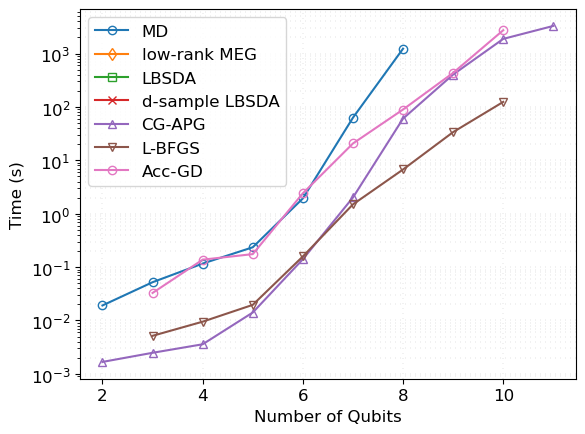

In [26]:
algo_list = [EMD, approx_MEG,LBSDA, d_LBSDA, qse_apg, LBFGS, AccGD]
plot_fval_vs_qubits("/Users/aditi/Documents/QST_camera_ready/results/data/maxcor_2", algo_list)#, "/Users/aditi/Documents/QST_camera_ready/results/figures")

In [ ]:
import scipy.sparse
import scipy.sparse.linalg

prob = qst1(output1['LBFGS']['rho'], nQubits)
prob = np.concatenate([0.5*(prob[0]+ prob[1:]), 0.5*(prob[0]- prob[1:])])
eta = np.sum(y/prob)

gradient = grad(output1['LBFGS']['rho'], nQubits, y, primitive1= qst1, primitive2=qst2)
B = eta*np.eye(2**nQubits) - gradient
max_eig_B, _ = scipy.sparse.linalg.eigsh(B,k = 1,  which = 'LM')

# true = scipy.sparse.linalg.eigsh(gradient, k = 1, which = 'SA')[0]
mu = (eta-max_eig_B)
mu = - mu 
print(mu)

sigma = gradient + mu*np.eye(2**nQubits)
np.trace(sigma.conj().T@rho_true)

# plot duality gap

In [1]:
from matplotlib.legend_handler import HandlerTuple
from matplotlib.ticker import LogLocator
from matplotlib import pyplot as plt, ticker as mticker

param = {}
algo_list = [LBFGS]
fig, axs = plt.subplots(1,1)
legend_handles = []
legend_labels = []

colors=['red', 'cyan']
c = 0

# dir = "/Users/aditi/Documents/QST_camera_ready/results/maxcor_2"
dir = "/Users/aditi/Documents/QST_camera_ready/Pauli_povm_CPU/results/r_d_4/maxcor_2"
for filename in os.listdir(dir):
    file_path = os.path.join(dir, filename)
    # check for .pickle file
    if filename.endswith('.pickle'):
        #read content
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
            if data['nQubits'] in [5, 4]:
                param['nQubits'] = data['nQubits']
                param['rho_true'] = data['rho_true']
                param['y'] = data['y']
                param['save'] = 0
                param['r_svd'] = data['r_svd']
                print(data['nQubits'])
                param['fun'] = fun
                param['gradf'] = grad
                param['cvxSolver'] = 'SCS'
                param['timeLimit'] = data['time_limit']

                m = 4**param['nQubits']
                nShots = 100*m
                _, _, _, _, Ap, _ = createSetupQST(param['nQubits'], nShots=nShots)
                Am = scipy.sparse.identity(2**param['nQubits']) - Ap
                A = sparse.concat((Ap, Am))
                param['A'] = A

                cvx_sol = cvxpy_convex(**param)
                cvx_fval = utils.fun(cvx_sol, param['nQubits'], param['y'], primitive1 = qst1, primitive2 = qst2)

                out = LBFGS(**param)
                gap = out['gap']
                p1, = axs.semilogy(gap, color = colors[c], linestyle = 'dashed')
                p2, = axs.semilogy(np.real_if_close(out['fval'])-cvx_fval, color = colors[c], linestyle = 'solid')

                axs.set_xlabel('iterations')
                axs.set_ylabel('error')
                legend_handles.append((p1, p2))
                legend_labels.append(f'n = {param["nQubits"]}')
                plt.grid(True, which='both', linestyle='--', alpha = 1.0 , linewidth = 0.3, dashes=(2, 10))
                fontSize=12
                plt.rcParams.update({
                'font.size': fontSize,         # Set font size for labels, legends, and ticks
                'axes.labelsize': fontSize,    # X and Y labels
                'legend.fontsize': fontSize,   # Legend
                'xtick.labelsize': fontSize,   # X-axis tick labels
                'ytick.labelsize': fontSize    # Y-axis tick labels
                })
                c += 1

# Add legend after the loop
axs.legend(legend_handles, legend_labels, handler_map={tuple: HandlerTuple(ndivide=None)})
plt.show()
                
fig.savefig("/Users/aditi/Documents/QST_camera_ready/Pauli_povm_CPU/results/figures/duality_gap_revised.pdf", format='pdf')
                
               


    

NameError: name 'LBFGS' is not defined

# add results to exisiting data files

In [4]:
cvx_sol = {}
algo_list = [qse_apg]
dir = "/Users/aditi/Documents/QST_camera_ready/results/data/maxcor_2"
for filename in os.listdir(dir):
    file_path = os.path.join(dir, filename)
    # check for .pickle file
    if filename.endswith('.pickle'):
        #read content
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
            if data['nQubits'] == 11:
                param = {}
                param['nQubits'] = data['nQubits']
                
                param['rho_true'] = data['rho_true']
                param['y'] = data['y']
                param['save'] = 0
                param['r_svd'] = data['r_svd']
                print(param['nQubits'], param['r_svd'])
                param['fun'] = fun
                param['gradf'] = grad
                param['cvxSolver'] = 'SCS'
                param['timeLimit'] = data['time_limit']
                param['warmstart'] = data['warmstart']
                param['eta'] = data['eta']
                param['eps_coeff'] = data['eps_coeff']
                param['c_eps'] = data['c_eps']
                param['n_rate'] = data['n_rate']
                param['state'] = 'Wstate'
                param['depolarize'] = 0.1

                output = run_experiment(algo_list, **param)
                # print(fidelity(output['AccGD']['rho'],  param['rho_true']))
                data.update(output)
                
                save_experiment(data, "/Users/aditi/Documents/QST_camera_ready/results/data", 'pickle', **param)
                


    

11 512
CG_APG starts.
2884962.1434823335
CG starts.
0
1


/Users/aditi/Documents/QST_camera_ready/code/APG_CG.py:1045: RuntimeWarning: invalid value encountered in arccos
  np.arccos(np.real(np.vdot(old_hessian_proxy, hessian_proxy)) /


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

: 

# LBFGS for different history sizes for hessian

In [ ]:
dir = "/Users/aditi/Documents/QST_camera_ready/results/data/"
save_destination = "/Users/aditi/Documents/QST_camera_ready/results/figures"
subdirectories = []
for root, dirs, files in os.walk(dir):
    subdirectories.extend([os.path.join(root, d) for d in dirs])

subdirectories = sorted(subdirectories, key=lambda x: int(x.split('_')[-1]))
# print("All Subdirectories:", subdirectories)
plt.figure()
algo_list = [EMD, LBSDA, d_LBSDA, qse_apg, LBFGS]
algo_list = [algo.__name__ for algo in algo_list]
output = {}
case = []
for subdir in subdirectories:
    case.append(subdir.rsplit('_', 1)[-1])
    #get file names
    for filename in os.listdir(subdir):
        nQubits = []
        file_path = os.path.join(subdir, filename)
        # print(file_path)
        # check for .pickle file
        if filename.endswith('.pickle'):
            #read content
            with open(file_path, 'rb') as f:
                data = pickle.load(f)
                nQubits.append(data['nQubits'])
                fval_min = np.inf
                for algo in algo_list:
                    if algo in data:
                        fval = data[algo]['fval']
                        fval_min = np.minimum(fval_min, np.min(fval))

                N = 4**(nQubits[-1])* 100       
                for algo in algo_list: 
                    if algo == 'LBFGS': 
                        fval = data[algo]['fval']
                        condition = (fval-fval_min) <= 1e-4 #-1/N * np.log(0.95)
                        idx = np.argmax(condition)
                        cumulative_time = data[algo]['elapsed_time']
                        time_taken = cumulative_time[idx] if condition[idx] else np.inf
                        output[data['nQubits']] = time_taken
                    else:
                        output[data['nQubits']] = np.inf           

    sorted_dict = dict(sorted(output.items()))

    # Plot the data
    markers = {'1' :'o', '2':'d', '5':'s', '10':'x'}
    linestyles = {'1' :'--', '2':'-', '5':'--', '10':'--'}
    # plt.figure(figsize=(10, 6))
    fontSize=12
    plt.rcParams.update({
    'font.size': fontSize,         # Set font size for labels, legends, and ticks
    'axes.labelsize': fontSize,    # X and Y labels
    'legend.fontsize': fontSize,   # Legend
    'xtick.labelsize': fontSize,   # X-axis tick labels
    'ytick.labelsize': fontSize    # Y-axis tick labels
    })

    plt.semilogy(sorted_dict.keys(), sorted_dict.values(), 
                 marker=markers[case[-1]], markerfacecolor='none', linestyle=linestyles[case[-1]],
                 label = 'history size = '+ case[-1])
    output = {}
plt.xlabel('Number of Qubits')
plt.ylabel('Time (s)')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', alpha = 1.0 , linewidth = 0.3, dashes=(2, 10))
plt.savefig(save_destination +'/LBFGS_histSize_low_acc.pdf', format='pdf')
    
plt.show()
    

In [12]:
t1= []
t2 = []
for n in range(6, 16):
    print(f"{n=}")
    d = 2**n
    r = int(d/4)
    M =  np.random.rand(2*r*d)
    M = M/np.linalg.norm(M)
    strt = time()
    g = grad(M, n, np.ones((2*(4**n)-2)), qst1, qst2, rank = r)
    t1.append(time()-strt)

    M = np.random.rand(d,d)
    strt = time()
    svd = proj_spectrahedron(M)
    t2.append(time()-strt)

flops = {'forwardOp':t1, 'svd':t2}
np.save('/Users/aditi/Documents/QST_camera_ready/results/data/', flops)

n=6
n=7
n=8
n=9
n=10
n=11
n=12
n=13
n=14
n=15


: 

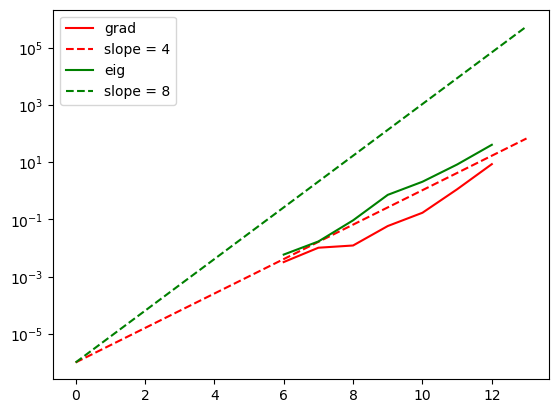

In [ ]:
plt.figure()
plt.semilogy(np.arange(6, 16), [1e0 * z for z in t1], 'r', label = 'grad')
# Parameters for the line
slope = 4 # m
y_intercept = 0  # c (logarithmic scale intercept, equivalent to 10^c)

# Generate x values
x = np.linspace(0, 16, 100)

# Compute y values (logarithmic slope)
y = slope**x/1e6
plt.semilogy(x, y, '--r', label='slope = 4')
plt.semilogy(np.arange(6, 16), [1e0 * z for z in t2], 'g', label = 'eig')
# plt.axline((0, 0), slope=8, color='g', linestyle='--')
slope = 8 # m
y_intercept = 0  # c (logarithmic scale intercept, equivalent to 10^c)

# Generate x values
x = np.linspace(0, 16, 100)

# Compute y values (logarithmic slope)
y = slope**x/ 1e6
plt.semilogy(x, y, '--g', label='slope = 8')
plt.legend()
plt.show()

In [2]:
K = 15
n = 2
d = 2**n
r = int(d/4)
M =  np.random.rand(d,r)
M = M/np.linalg.norm(M) 
y = np.random.rand(2*K)
# lowmemA(M,np.random.choice(np.arange(1, d**2), size=K, replace=False), np.ones((2*K)))
x, yy = lowmemA(M,np.arange(1, 16), r, y)